#importing important libraries

In [50]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Load the data set

In [51]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
X_test.shape

(10000, 28, 28)

In [54]:
#lets take a look how image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

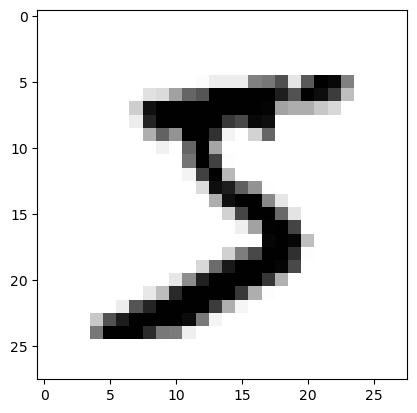

In [55]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.show()

#save the image as png
plt.imsave('mnist.png',X_train[0],cmap='binary')

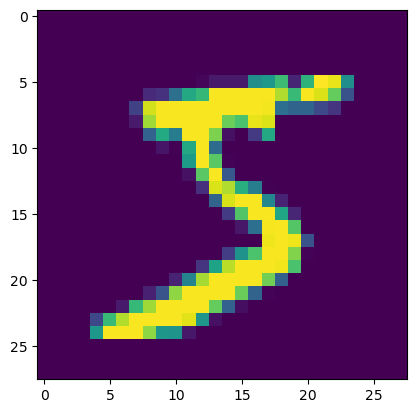

In [56]:
plt.imshow(X_train[0])

In [57]:
y_train[0]

5

#normalize the data

In [58]:
#the pizel value ranger from 0-255
#normalize the values using min max scaler
#formula is X-Xmin/Xmax-Xmin=X/255
X_train=X_train/255
X_test=X_test/255

In [59]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input and output dimensions
input_dims = X_train.shape[1]
output_dims = 10

# Defining the sequential model
model = Sequential()

# Add the 1st dense layer to the sequential model
model.add(Dense(512, activation="sigmoid", input_shape=(input_dims,), name="Hidden_layer_1"))

# Add the 2nd dense layer to the sequential model
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

# Add the output layer
model.add(Dense(output_dims, activation="softmax", name="output_layer"))


In [63]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#Compile a neural network

In [64]:
from tensorflow.keras.optimizers import RMSprop
#define the optimizer
optimizer=RMSprop(0.001)
#complile the model
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [65]:
#define the batch_size and no. of epochs
batch_size=128 #batch size should always be in 2^n where n=1,2,3,4....
num_epochs=20

#fit a neural network or train a neural_network
from keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_one_hot = to_categorical(y_train, num_classes=output_dims)

# Now y_train_one_hot should have shape (batch_size, output_dims)

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6166 - accuracy: 0.8398 - val_loss: 0.2834 - val_accuracy: 0.9179
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2485 - accuracy: 0.9271 - val_loss: 0.2060 - val_accuracy: 0.9398
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9435 - val_loss: 0.1682 - val_accuracy: 0.9518
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1474 - accuracy: 0.9568 - val_loss: 0.1404 - val_accuracy: 0.9610
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9643 - val_loss: 0.1285 - val_accuracy: 0.9617
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9710 - val_loss: 0.1116 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0804 - accuracy: 0.9765 - val_loss: 0.1025 - val_accuracy: 0.9682
Epoch 

In [66]:
from keras.utils import to_categorical

# Assuming y_test is a 1D array of integer labels
y_test_one_hot = to_categorical(y_test, num_classes=output_dims)

# Now y_test_one_hot should have shape (batch_size, output_dims)

# Evaluate your model
score = model.evaluate(x=X_test, y=y_test_one_hot, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])


Test score: 0.0804152861237526
Test accuracy: 0.9781000018119812


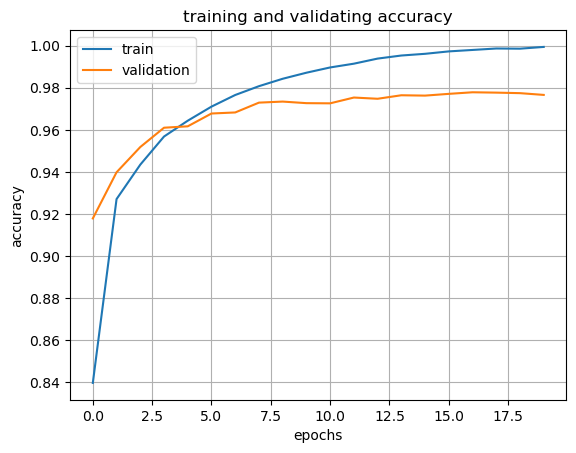

In [67]:
#plot training accuracy and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training and validating accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"])
plt.grid()
plt.show()

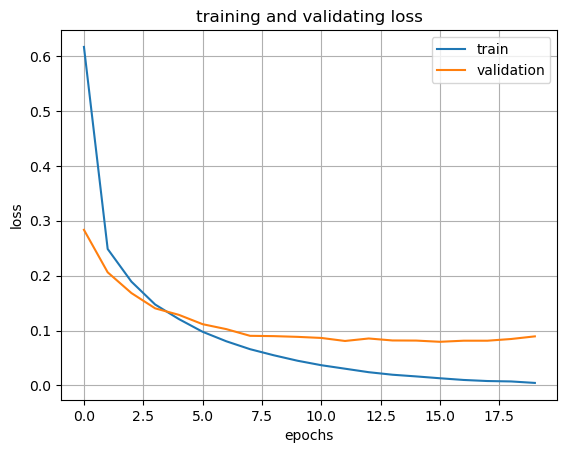

In [68]:
#plot training loss or validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training and validating loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"])
plt.grid()
plt.show()

In [69]:
y_test[0]

7

In [70]:
y_pred=model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 0s 992us/step


array([[1.9959127e-07, 2.1521164e-06, 4.6763907e-07, 1.1451009e-05,
        8.0913605e-09, 7.1008324e-09, 6.7611243e-13, 9.9993718e-01,
        7.3353119e-09, 4.8452257e-05],
       [3.1531445e-07, 1.0891429e-05, 9.9998820e-01, 2.5783834e-07,
        1.4690994e-10, 4.6226605e-09, 5.9298227e-08, 8.0938300e-08,
        2.5724222e-07, 9.3179527e-11],
       [2.8840271e-08, 9.9998188e-01, 2.9111525e-06, 2.0883865e-08,
        4.9138084e-08, 4.9190061e-07, 2.8886354e-06, 5.6179097e-06,
        6.0453799e-06, 2.8940727e-08],
       [9.9999082e-01, 5.2410780e-07, 3.5496118e-06, 2.3323754e-09,
        5.4406122e-08, 4.0931514e-08, 2.0496650e-06, 2.3466694e-06,
        2.8767171e-09, 5.6825644e-07],
       [4.0261948e-08, 6.7581825e-09, 1.0184790e-07, 1.4506089e-09,
        9.9998629e-01, 2.4570113e-09, 6.1295729e-08, 1.4719045e-06,
        1.2829248e-07, 1.1964063e-05],
       [2.4156680e-08, 9.9996090e-01, 1.3943831e-07, 1.6642989e-08,
        1.3087779e-07, 9.3140473e-09, 1.9714943e-08, 3.81

In [71]:
y_pred=np.array([np.argmax(pred)for pred in y_pred])
y_pred[0:10],y_test[0:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [72]:
# Import libraries for plotting Confusion Matrix and Classification Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# This function plots the confusion matrices given y_i, Y_i_hat.
def plot_confusion_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))

    # Color Map
    cmap = sns.light_palette("blue")

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title("Confusion matrix")
    plt.show()

    print()
    print('-' * 100)
    print("Classification Report: \n", classification_report(y_test, y_predict))
    print('Accuracy Score:', accuracy_score(y_test, y_predict) * 100)

# Example usage:
# Assuming you have y_test and y_predict
# plot_confusion_matrix(y_test, y_predict)


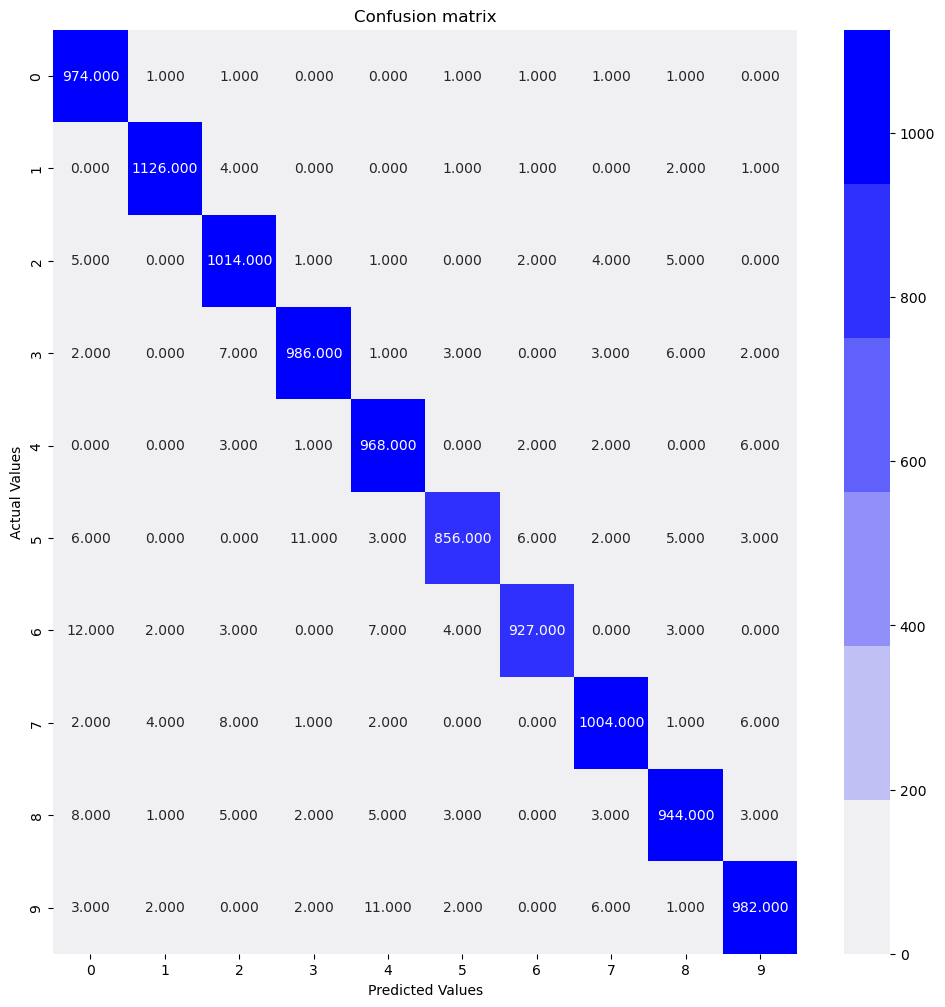


----------------------------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 97.81


In [73]:
plot_confusion_matrix(y_test, y_pred)


In [74]:
#save the model
model.save("mnist_model.h5")

In [75]:
#load the model
from tensorflow.keras.models import load_model
model=load_model("mnist_model.h5")

#predict the model
y_pred=model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 0s 903us/step


array([[1.9959127e-07, 2.1521164e-06, 4.6763907e-07, 1.1451009e-05,
        8.0913605e-09, 7.1008324e-09, 6.7611243e-13, 9.9993718e-01,
        7.3353119e-09, 4.8452257e-05],
       [3.1531445e-07, 1.0891429e-05, 9.9998820e-01, 2.5783834e-07,
        1.4690994e-10, 4.6226605e-09, 5.9298227e-08, 8.0938300e-08,
        2.5724222e-07, 9.3179527e-11],
       [2.8840271e-08, 9.9998188e-01, 2.9111525e-06, 2.0883865e-08,
        4.9138084e-08, 4.9190061e-07, 2.8886354e-06, 5.6179097e-06,
        6.0453799e-06, 2.8940727e-08],
       [9.9999082e-01, 5.2410780e-07, 3.5496118e-06, 2.3323754e-09,
        5.4406122e-08, 4.0931514e-08, 2.0496650e-06, 2.3466694e-06,
        2.8767171e-09, 5.6825644e-07],
       [4.0261948e-08, 6.7581825e-09, 1.0184790e-07, 1.4506089e-09,
        9.9998629e-01, 2.4570113e-09, 6.1295729e-08, 1.4719045e-06,
        1.2829248e-07, 1.1964063e-05],
       [2.4156680e-08, 9.9996090e-01, 1.3943831e-07, 1.6642989e-08,
        1.3087779e-07, 9.3140473e-09, 1.9714943e-08, 3.81

In [85]:
#load image from folder     
from tensorflow.keras.preprocessing import image
img_test_real=image.load_img("1.png",target_size=(28,28),color_mode="grayscale")
img_test_real

In [86]:
#convert image to array
img_test_real=image.img_to_array(img_test_real)
img_test_real.shape

(28, 28, 1)

In [87]:
#reshape the image
img_test_real=img_test_real.reshape(1,784)
img_test_real.shape

#normalize the image
img_test_real=img_test_real/255
img_test_real

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [88]:
#predict the image
y_pred=model.predict(img_test_real)
y_pred

1/1 [==============================] - 0s 14ms/step


array([[5.3629714e-01, 2.2860610e-05, 3.2585770e-01, 5.9166871e-02,
        1.3955140e-07, 1.6304709e-02, 1.1274993e-05, 1.8620673e-04,
        2.8114769e-04, 6.1871905e-02]], dtype=float32)

In [97]:
#convert the prediction into label
y_pred=np.argmax(y_pred)
y_pred

0

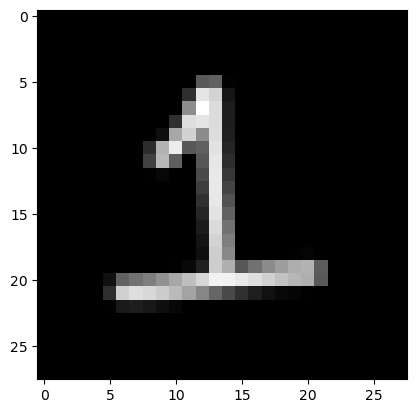

In [91]:
#lets take a look how image looks like
plt.imshow(img_test_real.reshape(28,28),cmap='binary')
plt.show()
